In [1]:
!pip install llm-lens

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 29.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend depende

In [2]:
import requests
from lens import Lens, LensProcessor
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torch
import numpy as np

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base",truncation_side = 'left',padding = True)
LLM_model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")

lens = Lens()
processor = LensProcessor()


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/22131 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/llm-lens___parquet/llm-lens--vocab_tags-3967da3420888436/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7. Subsequent calls will reuse this data.


Extracting data files:   0%|          | 0/15 [00:00<?, ?it/s]

Generating birdsnap split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating caltech101 split:   0%|          | 0/102 [00:00<?, ? examples/s]

Generating cifar100 split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating coco split:   0%|          | 0/80 [00:00<?, ? examples/s]

Generating dtd split:   0%|          | 0/47 [00:00<?, ? examples/s]

Generating fgvc split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating food101 split:   0%|          | 0/101 [00:00<?, ? examples/s]

Generating full split:   0%|          | 0/4951 [00:00<?, ? examples/s]

Generating imagenet21k split:   0%|          | 0/998 [00:00<?, ? examples/s]

Generating lvis split:   0%|          | 0/1198 [00:00<?, ? examples/s]

Generating oxfordflowers split:   0%|          | 0/102 [00:00<?, ? examples/s]

Generating oxfordpets split:   0%|          | 0/37 [00:00<?, ? examples/s]

Generating stanfordcars split:   0%|          | 0/196 [00:00<?, ? examples/s]

Generating sun397 split:   0%|          | 0/362 [00:00<?, ? examples/s]

Generating visualgenome split:   0%|          | 0/1913 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/llm-lens___parquet/llm-lens--descriptors-text-davinci-003-5b004a4b8f767934/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7. Subsequent calls will reuse this data.


In [23]:
img_url = 'https://images.unsplash.com/photo-1465056836041-7f43ac27dcb5?w=720'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
question = "What is the image about?"


with torch.no_grad():
    samples = processor([raw_image],[question])
    output = lens(samples)
    prompts = output["prompts"]

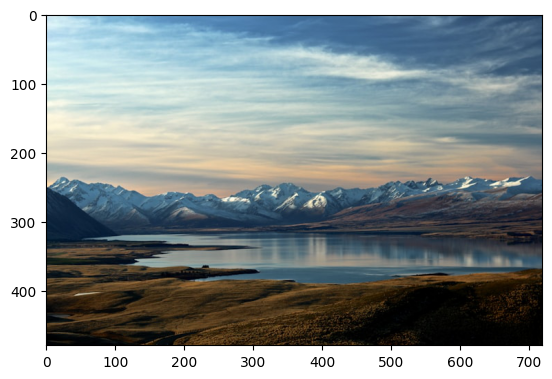

In [24]:
plt.imshow(np.array(raw_image))

In [25]:
samples["prompts"]

['Tags:\n-Glacial lake\n-Mountain range\n-mountains\n-Lake district\n-Steppe\nAttributes:\n-destination which has Natural features such as mountains, rivers, or lakes\n-lake which has large body of water surrounded by land\n-peace which is a peaceful landscape or scenery\n-place which has natural features like mountains, rivers, and lakes\n-mountains which has snow-capped peaks\nCaptions:\n-a herd of sheep graze near a mountain lake\n-a large snow covered mountain with a lake\n-a boat on an island next to a body of water\n-a sheep looking at a lake near very tall mountains\n-a small, distant area filled with snow capped mountains\n-a lake and mountains under a cloudy sky\n-a view of mountains near a lake in a field\n-a small animal in shallow water near the mountains\n-a landscape view of lots of mountains and a lake with a few boats in it\n-a very scenic view of a very very big lake\nQuestion:What is the image about?\nShort Answer:']

In [26]:
input_ids = tokenizer(prompts, return_tensors="pt").input_ids
outputs = LLM_model.generate(input_ids)
print(tokenizer.decode(outputs[0],skip_special_tokens=True))

a mountain lake with a lake


In [17]:
custom_prompt=['Tags:\n-Glacial lake\n-Mountain range\n-mountains\n-Lake district\n-Steppe\nAttributes:\n-destination which has Natural features such as mountains, rivers, or lakes\n-lake which has large body of water surrounded by land\n-peace which is a peaceful landscape or scenery\n-place which has natural features like mountains, rivers, and lakes\n-mountains which has snow-capped peaks\nCaptions:\n-grassy land with some water as it sits on the shore\n-several large lakes in a big mountain covered in snow\n-horses in the foreground of a lake on a mountain hillside\n-the view of snow capped mountains in a lake and mountains\n-an image of a scenic view from above the plains\n-a hill on a grassy hill next to a body of water\n-the view of the alps from the mountain top\n-a plane over a scenic valley on a cloudy day\n-a small bus going along a wide lake and a mountain range under a partly cloudy sky\n-large hills with a body of water in an open area\nQuestion:Is there lake in the image?\nShort Answer:']

In [18]:
input_ids = tokenizer(custom_prompt, return_tensors="pt").input_ids
outputs = LLM_model.generate(input_ids)
print(tokenizer.decode(outputs[0],skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


yes


In [19]:
custom_prompt=['Tags:\n-Glacial lake\n-Mountain range\n-mountains\n-Lake district\n-Steppe\nAttributes:\n-destination which has Natural features such as mountains, rivers, or lakes\n-lake which has large body of water surrounded by land\n-peace which is a peaceful landscape or scenery\n-place which has natural features like mountains, rivers, and lakes\n-mountains which has snow-capped peaks\nCaptions:\n-grassy land with some water as it sits on the shore\n-several large lakes in a big mountain covered in snow\n-horses in the foreground of a lake on a mountain hillside\n-the view of snow capped mountains in a lake and mountains\n-an image of a scenic view from above the plains\n-a hill on a grassy hill next to a body of water\n-the view of the alps from the mountain top\n-a plane over a scenic valley on a cloudy day\n-a small bus going along a wide lake and a mountain range under a partly cloudy sky\n-large hills with a body of water in an open area\nQuestion: Are mountains covered in snow?\nShort Answer:']

In [20]:
input_ids = tokenizer(custom_prompt, return_tensors="pt").input_ids
outputs = LLM_model.generate(input_ids)
print(tokenizer.decode(outputs[0],skip_special_tokens=True))

yes


In [21]:
custom_prompt=['Tags:\n-Glacial lake\n-Mountain range\n-mountains\n-Lake district\n-Steppe\nAttributes:\n-destination which has Natural features such as mountains, rivers, or lakes\n-lake which has large body of water surrounded by land\n-peace which is a peaceful landscape or scenery\n-place which has natural features like mountains, rivers, and lakes\n-mountains which has snow-capped peaks\nCaptions:\n-grassy land with some water as it sits on the shore\n-several large lakes in a big mountain covered in snow\n-horses in the foreground of a lake on a mountain hillside\n-the view of snow capped mountains in a lake and mountains\n-an image of a scenic view from above the plains\n-a hill on a grassy hill next to a body of water\n-the view of the alps from the mountain top\n-a plane over a scenic valley on a cloudy day\n-a small bus going along a wide lake and a mountain range under a partly cloudy sky\n-large hills with a body of water in an open area\nQuestion: Is there a panda in the image?\nShort Answer:']

In [22]:
input_ids = tokenizer(custom_prompt, return_tensors="pt").input_ids
outputs = LLM_model.generate(input_ids)
print(tokenizer.decode(outputs[0],skip_special_tokens=True))

no
